In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [7]:
# Load the data
data = pd.read_csv('data/processed_features.csv')
features = data.iloc[:, :len(data.columns) - 2]
emotion_labels = data["target"]
intensity_labels = data["intensity"]


Accuracy: 0.3765182186234818
Accuracy: 0.3643724696356275


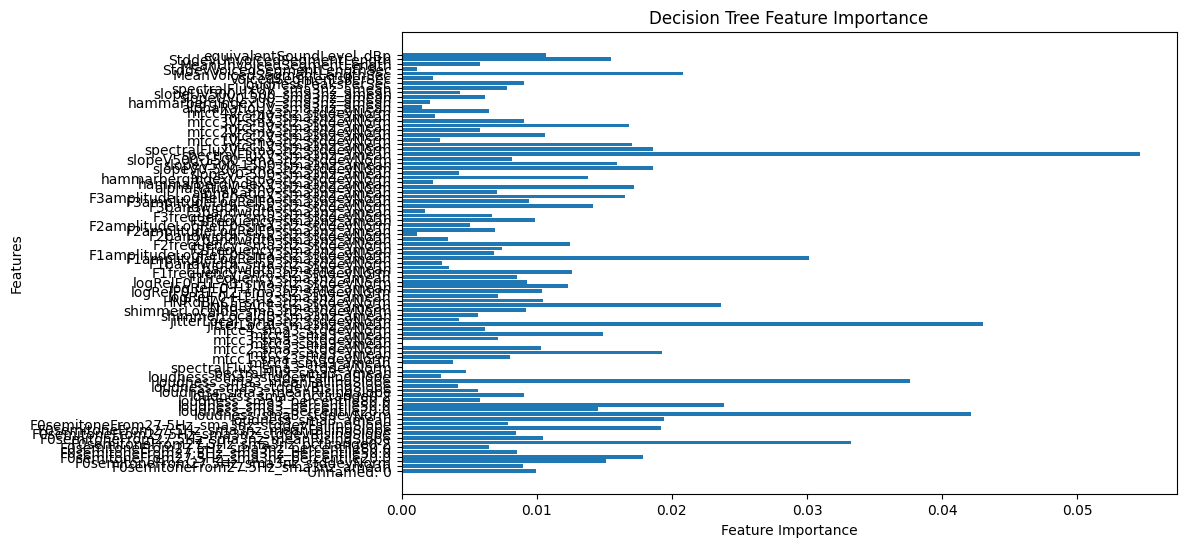

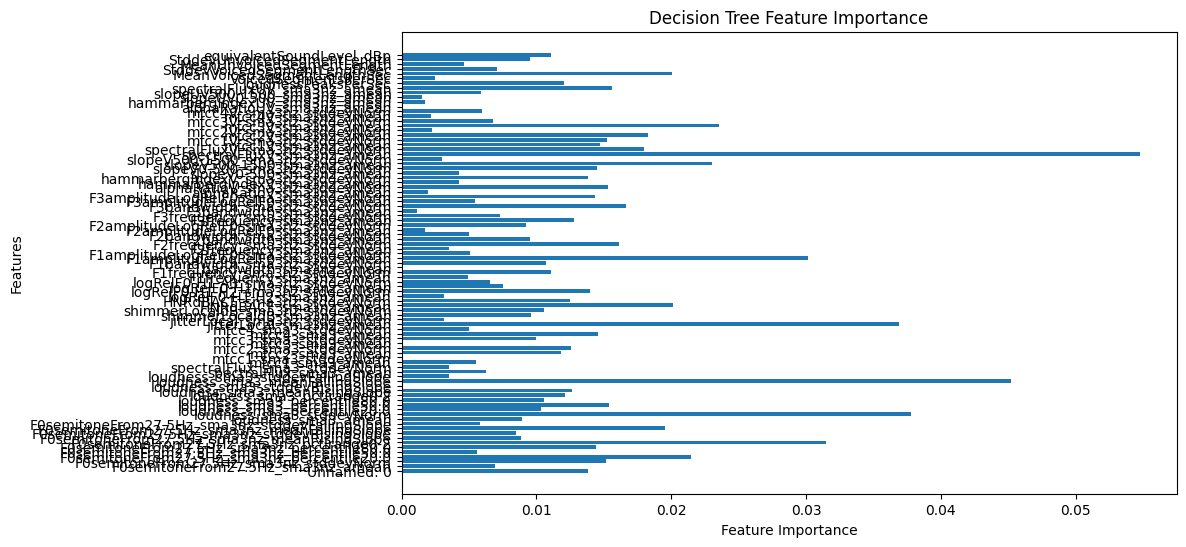

In [10]:
# Split the data into training and testing sets
X_train_emo, X_test_emo, y_train_emo, y_test_emo = train_test_split(features, emotion_labels, test_size=0.2, random_state=42)
X_train_in, X_test_in, y_train_in, y_test_in = train_test_split(features, emotion_labels, test_size=0.2, random_state=42)


# Create a decision tree classifier
clf_emo = DecisionTreeClassifier()
clf_in = DecisionTreeClassifier()

# Train the classifier on the training data
clf_emo.fit(X_train_emo, y_train_emo)
clf_in.fit(X_train_in, y_train_in)

# Extract feature importance
feature_importance_emo = clf_emo.feature_importances_
feature_importance_in = clf_in.feature_importances_

# Predict
y_pred_emo = clf_emo.predict(X_test_emo)
y_pred_in = clf_in.predict(X_test_in)


accuracy_emo = accuracy_score(y_test_emo, y_pred_emo)
print("Accuracy:", accuracy_emo)
accuracy_in = accuracy_score(y_test_in, y_pred_in)
print("Accuracy:", accuracy_in)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features.columns, feature_importance_emo)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(features.columns, feature_importance_in)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()